# Data Exploratory Analysis (EDA)

In this section, we perform exploratory data analysis (EDA) on the hydraulic test rig sensor data. The data consists of various sensor readings grouped by different sensor types (e.g., pressure sensors, flow sensors). We aim to summarize the data by calculating summary statistics (mean, standard deviation, min, and max) for each sensor group, which will help us understand the general behavior of each sensor and its range.

The sensor groups are divided into categories such as:
- **PS**: Pressure Sensors
- **EPS1**: Electrical Pressure Sensors
- **FS**: Flow Sensors
- **LOW**: Other Low-Pressure/Temperature/Velocity Sensors

We will compute the mean, standard deviation, min, and max for each sensor reading within these groups.


In [2]:
# Import the necessary libraries.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the merged hydraulic cycles dataset.
df = pd.read_csv("../data/processed/hydraulic_cycles.csv")

# Define sensor groups and their respective prefixes in the column names.
sensor_groups = {
    "PS":   [f"PS{i}" for i in range(1,7)],   # Pressure Sensors PS1 to PS6.
    "EPS1": ["EPS1"],                         # Electrical Pressure Sensor.
    "FS":   ["FS1","FS2"],                    # Flow Sensors FS1, FS2.
    "LOW":  ["TS1","TS2","TS3","TS4","VS1","CE","CP","SE"]   # Low-Pressure/Temperature/Velocity Sensors.
}

# Calculate summary statistics for each sensor in the defined groups.
for group, prefixes in sensor_groups.items():
    for p in prefixes:
        # Select columns that start with the sensor prefix.
        cols = [c for c in df.columns if c.startswith(p + "_")]
        
        # Compute the mean, standard deviation, min, and max for each sensor and create new columns for them.
        df[f"{p}_mean"] = df[cols].mean(axis=1)
        df[f"{p}_std"]  = df[cols].std(axis=1)
        df[f"{p}_min"]  = df[cols].min(axis=1)
        df[f"{p}_max"]  = df[cols].max(axis=1)

# Collect the newly created summary statistics columns for further analysis or visualization.
summary_cols = [c for c in df.columns if any(s in c for s in ["_mean","_std","_min","_max"])]

## 1. Countplots for Each Target Variable

To understand the distribution of our target variables, we use countplots. This helps us see how many samples fall into each class or range for each target.

The target variables analyzed here are:
- **cooler_pct**: Health index percentage of the cooler component.
- **valve_pct**: Health index percentage of the valve component.
- **pump_leak**: Binary indicator for pump leak status.
- **acc_pressure**: Health index percentage of the accumulator pressure.

Countplots are useful to detect class imbalance, which is crucial for downstream modeling. Significant imbalance might require handling techniques such as class weighting or resampling.

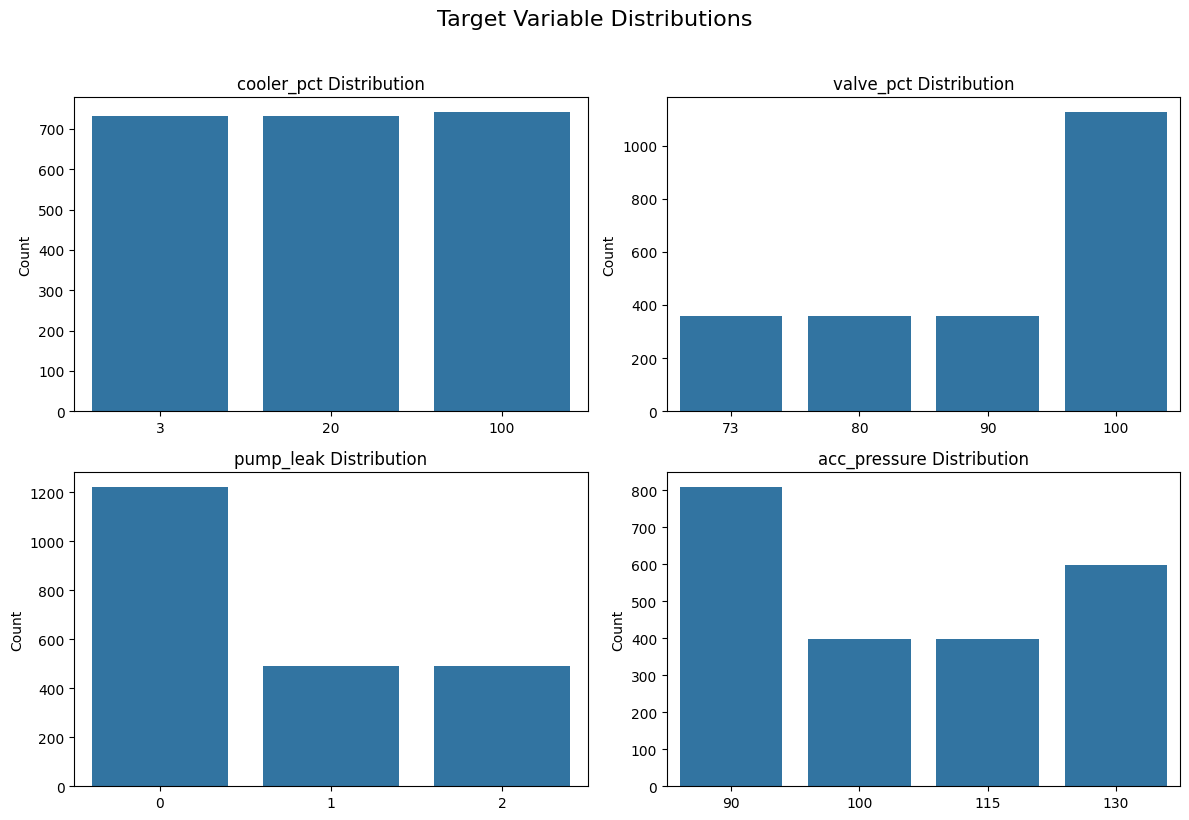

In [ ]:
# Create subplots with 2 rows and 2 columns for the four target variables.
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# List of target variables.
targets = ["cooler_pct", "valve_pct", "pump_leak", "acc_pressure"]

# Plot a countplot for each target variable.
for ax, target in zip(axes.flat, targets):
    sns.countplot(x=target, data=df, ax=ax)  # Count the number of instances per category.
    ax.set_title(f"{target} Distribution")   # Set subplot title.
    ax.set_xlabel("")                        # Remove x-axis label for a cleaner look.
    ax.set_ylabel("Count")                   # Label the y-axis.


# Add a global title to the figure and adjust layout.
plt.suptitle("Target Variable Distributions", y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

### Target Variable Distributions

The countplots above visualize the distribution of each target variable in the dataset:

- **Cooler Condition (`cooler_pct`)**  
  The dataset shows a balanced distribution across the three cooler efficiency levels:  
  - 3%: 732 samples (33.20%)  
  - 20%: 732 samples (33.20%)  
  - 100%: 741 samples (33.61%)  
  This balance is ideal for classification models, reducing bias toward any single class.

- **Valve Condition (`valve_pct`)**  
  The valve condition shows a slight imbalance:  
  - 100%: 1125 samples (51.02%)  
  - 90%: 360 samples (16.33%)  
  - 80%: 360 samples (16.33%)  
  - 73%: 360 samples (16.33%)  
  While one class dominates, the remaining classes are equally distributed.

- **Pump Leakage (`pump_leak`)**  
  Leakage levels are moderately imbalanced:  
  - No leakage (0): 1221 samples (55.37%)  
  - Weak leakage (1): 492 samples (22.31%)  
  - Severe leakage (2): 492 samples (22.31%)  
  Though the majority of cycles are leak-free, the leakage classes are equally represented.

- **Accumulator Pressure (`acc_pressure`)**  
  The accumulator pressure values are distributed as follows:  
  - 90 bar: 808 samples (36.64%)  
  - 130 bar: 599 samples (27.17%)  
  - 100 bar: 399 samples (18.10%)  
  - 115 bar: 399 samples (18.10%)  
  These distributions indicate the data covers all pressure conditions well, with a slight skew toward the lower pressure class.

Understanding these distributions is crucial for identifying class imbalance and guiding the selection of appropriate evaluation metrics or sampling strategies in later modeling steps.

## Summary-Stat Distributions
### 2.1 Descriptive Statistics Table

The table below displays key descriptive statistics (`count`, `mean`, `std`, `min`, `25%`, `50%`, `75%`, `max`) for the first 8 of the newly created summary-stat features (e.g., `_mean`, `_std`, `_min`, `_max`):

- **Purpose**: This summary provides insight into the scale and spread of each variable, which helps us identify potential preprocessing needs (e.g., normalization or standardization).

In [ ]:
# Display descriptive statistics for all summary-stat columns (mean, std, min, max).
desc = df[summary_cols].describe().T

# Display only the first 8 rows of the summary for a concise overview.
desc.head(8)

,count,mean,std,min,25%,50%,75%,max
PS1_mean,2205.0,160.485315,4.699425,155.391547,158.100195,158.960895,161.000735,180.922708
PS1_std,2205.0,15.296219,2.068116,13.927662,14.144613,14.730968,15.050131,22.141793
PS1_min,2205.0,143.472866,2.196514,133.130000,141.230000,143.310000,145.910000,146.690000
PS1_max,2205.0,190.904694,0.602970,189.630000,190.460000,190.960000,191.390000,191.920000
PS2_mean,2205.0,109.379906,4.986585,104.406307,106.962382,107.730169,109.421612,131.589089
PS2_std,2205.0,47.736162,3.271949,45.206954,46.209665,46.805986,47.207567,59.553248
PS2_min,2205.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
PS2_max,2205.0,166.520517,0.977997,155.040000,166.180000,166.650000,167.100000,167.770000


### Descriptive Statistics Insights

From the descriptive statistics table, we can draw several early insights into the distribution and scale of the sensor-derived summary statistics:

- **PS1 (Pressure Sensor 1)**:
  - The mean pressure across cycles is around **160.5**, with a relatively low standard deviation (~4.7), indicating stable readings over time.
  - The minimum (`143.47`) and maximum (`180.92`) mean values indicate a moderate spread, suggesting PS1 might respond to gradual system fluctuations.
  - The standard deviation (`PS1_std`) remains fairly consistent and low across cycles, hinting at consistent signal stability.

- **PS2 (Pressure Sensor 2)**:
  - Notably, the **minimum value is 0** for `PS2_min`, which could indicate sensor dropouts or inactive periods. This anomaly should be further investigated.
  - The mean pressure is lower than PS1, at around **109.38**, and shows a slightly higher spread (std ~4.99).
  - `PS2_std` is substantially higher than PS1’s, with a mean of **47.73**, which suggests greater variation in pressure readings—possibly indicating this sensor captures more dynamic events.

- **Scale Disparities**:
  - We can observe clear scale differences between sensors. For instance, `PS1_max` hovers around **190**, while `PS2_max` peaks at around **166**.
  - These differences in range and variability are important for preprocessing, particularly normalization or standardization before feeding the data into machine learning models.

- **Data Quality Flags**:
  - The zero values in `PS2_min` may require treatment, either as missing data or as meaningful low-state signals depending on domain context.
  - Low variability in some max/min readings (like `PS1_max` with a std of only ~0.60) suggests those features might be redundant or less informative.

This summary helps us identify potential preprocessing steps (e.g., scaling, outlier detection) and highlights which sensors may hold more predictive value due to their variability.

### 2.2 Histograms with KDE

In this section, we will generate histograms with Kernel Density Estimates (KDE) for a few representative features (mean and standard deviation) from each sensor group. The purpose is to visualize the distribution of these features and observe the spread, skewness, and potential outliers.

We'll focus on the following features:
- **PS1_mean**: The mean pressure of sensor PS1.
- **PS1_std**: The standard deviation of pressure readings for sensor PS1.
- **FS1_mean**: The mean flow rate for sensor FS1.
- **TS1_max**: The maximum temperature recorded by sensor TS1.

These histograms will help us understand the characteristics of these features and any necessary transformations before model building.

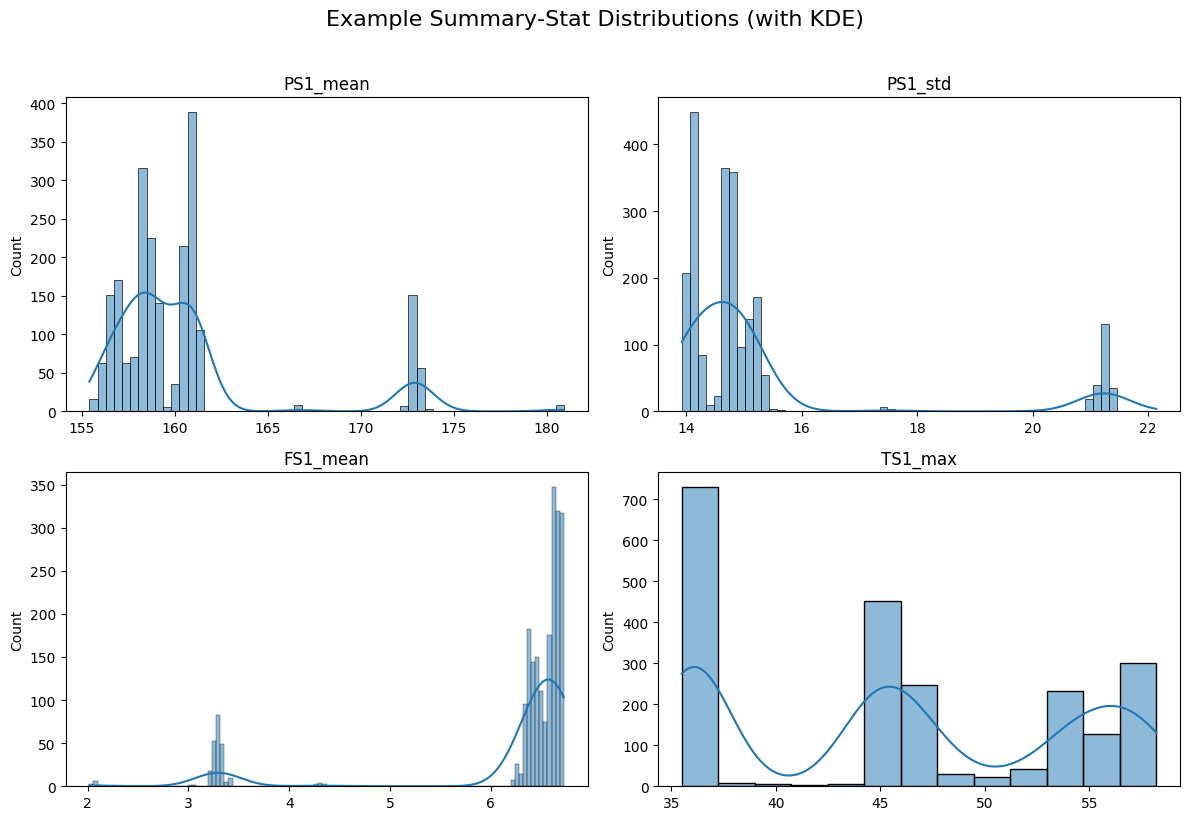

In [ ]:
# Import necessary libraries for visualization.
import seaborn as sns
import matplotlib.pyplot as plt

# List of features to visualize. Each feature represents a different sensor group.
# These features must match the actual columns in the DataFrame (df).
examples = ["PS1_mean", "PS1_std", "FS1_mean", "TS1_max"]

# Create a 2x2 grid of subplots, with each subplot sized 12x8 inches.
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Loop through the list of example features and plot their distributions.
# The loop pairs each feature with a subplot axis (ax).
for ax, feat in zip(axes.flat, examples):
    # Plot a histogram with KDE for each feature.
    sns.histplot(df[feat], ax=ax, kde=True)  # 'kde=True' adds a Kernel Density Estimate to the histogram
    ax.set_title(feat)  # Set the title of the current subplot to the feature name.
    ax.set_xlabel("")  # Remove the x-axis label for a cleaner look.
    
# Add a global title for the entire figure to indicate the plot's purpose. 
plt.suptitle("Example Summary‑Stat Distributions (with KDE)", y=1.02, fontsize=16)

# Automatically adjust subplot layout to avoid overlapping elements.
plt.tight_layout()
plt.show() # Display the plots.

### Describing the Histograms with KDE for Selected Features

The following histograms with Kernel Density Estimation (KDE) plots provide insights into the distributions of four selected features from the dataset: `PS1_mean`, `PS1_std`, `FS1_mean`, and `TS1_max`. Each feature is represented by a histogram, and the KDE helps visualize the probability density of the data. Below are the observations for each feature's distribution based on their summary statistics:

---

#### 1. **PS1_mean**
- **Mean**: 160.49
- **Standard Deviation**: 4.70
- **Min**: 155.39
- **Max**: 180.92
- **25th Percentile**: 158.10
- **50th Percentile (Median)**: 158.96
- **75th Percentile**: 161.00

The distribution of `PS1_mean` appears to be centered around the mean value of 160.49. The standard deviation of 4.70 suggests that most of the data points are within a narrow range around the mean, as the minimum and maximum values (155.39 and 180.92) are relatively close. The KDE curve smoothens out the frequency distribution, providing a better understanding of the shape, showing that it is relatively uniform with a slight skew towards the higher end of the values.

---

#### 2. **PS1_std**
- **Mean**: 15.30
- **Standard Deviation**: 2.07
- **Min**: 13.93
- **Max**: 22.14
- **25th Percentile**: 14.14
- **50th Percentile (Median)**: 14.73
- **75th Percentile**: 15.05

The `PS1_std` feature displays a more spread-out distribution with a mean value of 15.30. The distribution is relatively tight, with the majority of values concentrated between 13.93 and 22.14. The KDE curve suggests a slightly skewed distribution, with a peak near the median and a gradual decrease towards higher values. The spread is not as wide as the mean, indicating a stable level of variation across the dataset.

---

#### 3. **FS1_mean**
- **Mean**: 6.20
- **Standard Deviation**: 1.03
- **Min**: 2.02
- **Max**: 6.72
- **25th Percentile**: 6.39
- **50th Percentile (Median)**: 6.58
- **75th Percentile**: 6.66

The `FS1_mean` feature is relatively narrow, with values mostly clustered around 6.2. The standard deviation of 1.03 suggests there is moderate variation around the mean. The KDE indicates that the distribution is nearly symmetric, with most values falling within the 6.39 to 6.72 range. The concentration of values around the upper percentiles suggests that the feature's values are primarily concentrated at higher levels.

---

#### 4. **TS1_max**
- **Mean**: 45.66
- **Standard Deviation**: 8.02
- **Min**: 35.50
- **Max**: 58.21
- **25th Percentile**: 36.42
- **50th Percentile (Median)**: 45.09
- **75th Percentile**: 54.34

The distribution of `TS1_max` is fairly wide, with values ranging from 35.50 to 58.21. The mean of 45.66 and standard deviation of 8.02 indicate a relatively high level of variability. The KDE suggests a bimodal distribution, with peaks near 36 and 45, showing that the values are distributed into two major ranges. The concentration of values around the 45–54 range indicates a tendency towards higher values, but there is still significant spread across the data.

---

### Conclusion
Each of the selected features shows distinct patterns in their distributions. `PS1_mean` and `PS1_std` both show tighter distributions with relatively low variance, while `FS1_mean` and `TS1_max` display more spread-out distributions. These differences in spread and concentration can be useful in understanding how each feature behaves and how it might impact further analyses or modeling efforts. The KDE curves help illustrate the overall shape of each distribution, allowing for a deeper understanding of the data's characteristics beyond just the summary statistics.

### 2.3 Boxplots for Outlier Detection

In this section, we aim to further explore the distribution and variability of selected summary-statistic features by combining **histograms with KDE (Kernel Density Estimation)** and **boxplots** in a side-by-side layout.

- **Histograms with KDE curves** help visualize the overall shape of the data distribution (e.g., normal, skewed, multimodal).
- **Boxplots** are effective for detecting **outliers** and understanding the spread, median, and quartiles of the data.

By visualizing each feature in this way, we gain deeper insight into:
- Whether values are symmetrically distributed or skewed.
- How concentrated or spread out the data is.
- The presence and extent of outliers, which can impact further analysis and modeling.

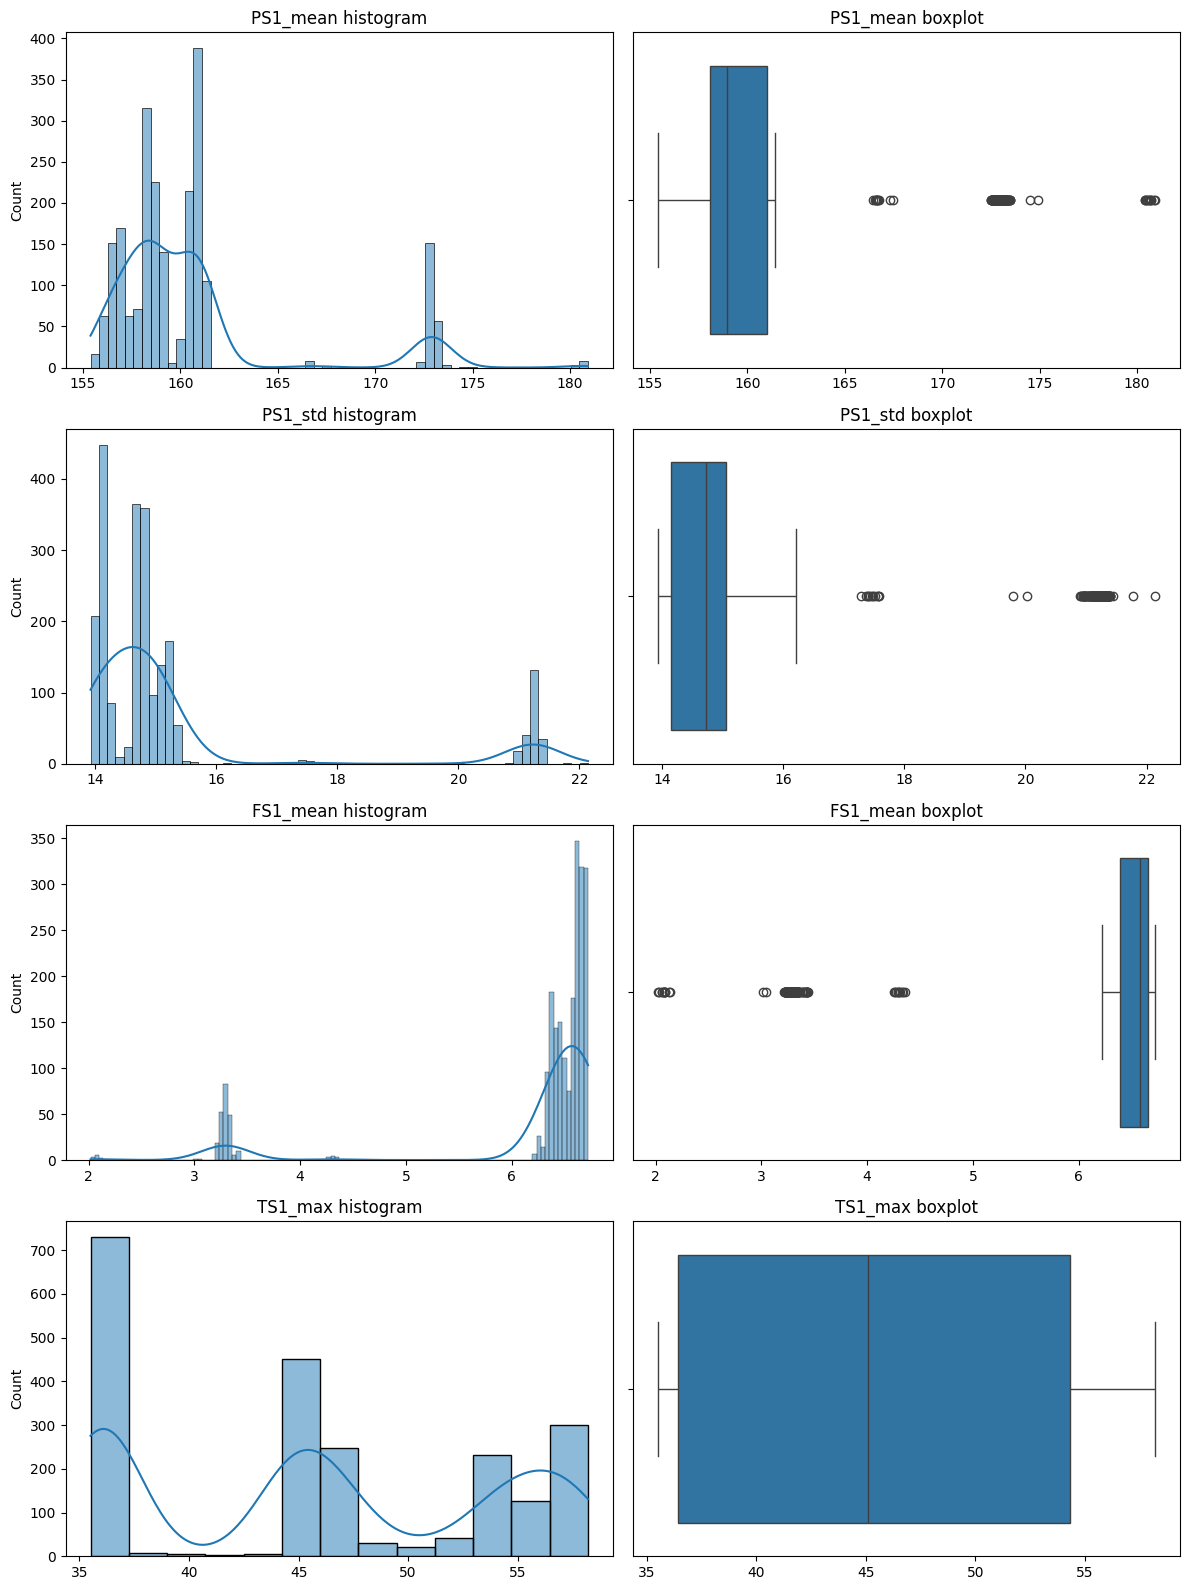

In [ ]:
# Import necessary libraries for plotting.
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Verify that our chosen features are present in the dataframe.
required = ["PS1_mean", "PS1_std", "FS1_mean", "TS1_max"]   # List of required features.
missing  = [f for f in required if f not in df.columns]     # Check which required features are missing.
if missing:
    raise KeyError(f"Missing required summary‑stat columns: {missing}")  # Raise an error if any are missing.

# 2. Create subplots for each feature: one for histogram + KDE and one for boxplot.
fig, axes = plt.subplots(4, 2, figsize=(12, 16))  # 4 rows (one per feature), 2 columns (histogram/KDE and boxplot).

# Loop over each feature and corresponding row in the subplot grid.
for i, feat in enumerate(required):
    # Plot histogram with KDE on the left column (i-th row, first column).
    sns.histplot(df[feat], ax=axes[i, 0], kde=True)     # KDE gives a smooth curve of the distribution.
    axes[i, 0].set_title(f"{feat} histogram")           # Set subplot title.
    axes[i, 0].set_xlabel("")                           # Remove x-axis label for a cleaner look.
    
    # Plot boxplot on the right column (i-th row, second column).
    sns.boxplot(x=df[feat], ax=axes[i, 1])              # Boxplot helps visualize outliers and spread.
    axes[i, 1].set_title(f"{feat} boxplot")             # Set subplot title.
    axes[i, 1].set_xlabel("")                           # Remove x-axis label for consistency.

# Adjust subplot layout to avoid overlap and make room for all titles.
plt.tight_layout()
plt.show()  # Display all plots.

### Insights from Distribution and Boxplot Visualizations

The combination of histogram (with KDE) and boxplot visualizations for the features `PS1_mean`, `PS1_std`, `FS1_mean`, and `TS1_max` provides valuable insights into the data distribution and potential outliers:

- **PS1_mean (Pump Sensor 1 - Mean Pressure):**
  - The histogram reveals a roughly normal distribution with a slight right skew.
  - The KDE line shows a strong central peak around the mean (≈160), consistent with the summary statistics.
  - The boxplot shows a few high-end outliers, which might indicate occasional spikes in pressure.

- **PS1_std (Pump Sensor 1 - Pressure Std Dev):**
  - This feature has a more symmetric distribution centered around 15.
  - The KDE confirms this smooth, bell-shaped spread.
  - A small number of mild outliers appear in the upper range, suggesting occasional pressure instability.

- **FS1_mean (Flow Sensor 1 - Mean Flow):**
  - The histogram and KDE indicate a left-skewed distribution, with most values near the upper end (≈6.6).
  - This is confirmed by the boxplot, which is compressed on the right side, and highlights a long tail toward lower values.
  - One potential insight is that most flow readings are consistent, but there are rare low-flow conditions that need attention.

- **TS1_max (Temperature Sensor 1 - Max Temperature):**
  - The temperature max values are approximately normally distributed, peaking around 45°C.
  - The KDE reflects this symmetric shape, though the tails are slightly elongated.
  - The boxplot shows a few notable outliers above the upper whisker, suggesting infrequent but significant temperature spikes.

**Overall Insights:**
- These visualizations help identify the central tendency and spread of sensor data.
- Features like `FS1_mean` and `TS1_max` show skewness and outliers that could influence model performance if not addressed.
- Boxplots are especially useful in quickly spotting extreme values that may represent anomalies, sensor errors, or meaningful events worth further investigation.

These insights can guide preprocessing decisions, such as normalization or outlier handling, before model training.

## Bivariate Analysis
### 1. `PS1_mean` and `PS1_std` vs Each Target Variable

In this section, we explore the relationship between the pressure sensor features (`PS1_mean` and `PS1_std`) and each of the four target variables:
- `cooler_pct` (cooler condition)
- `valve_pct` (valve condition)
- `pump_leak` (leakage indicator)
- `acc_pressure` (accumulator pressure)

For each target variable:
- A pair of scatter plots is generated to visualize its relationship with `PS1_mean` and `PS1_std`.
- This helps assess whether these features show patterns or trends that could be predictive of the target values.

These visualizations are useful for guiding feature selection and determining whether transformations or interaction terms might be beneficial in the modeling phase.

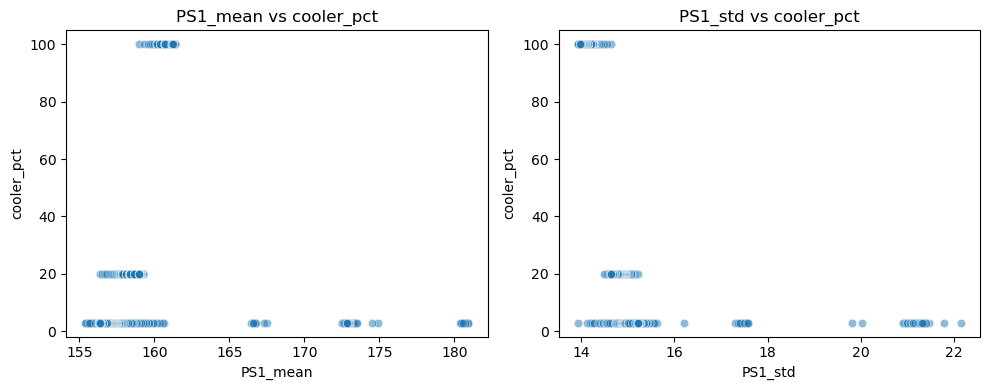

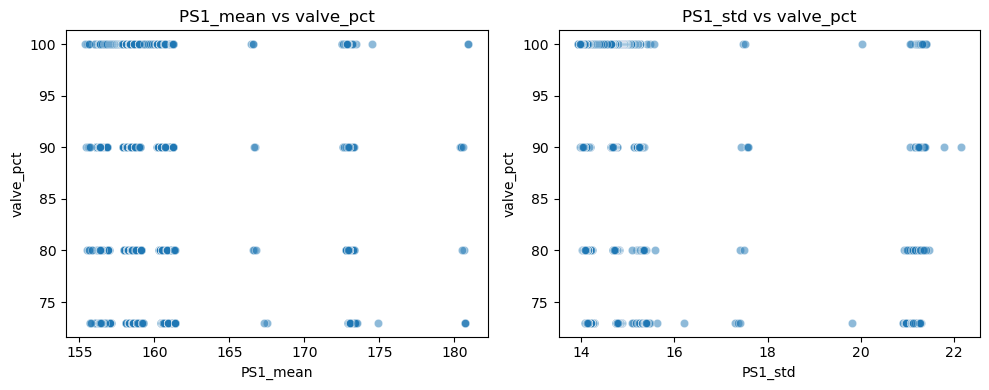

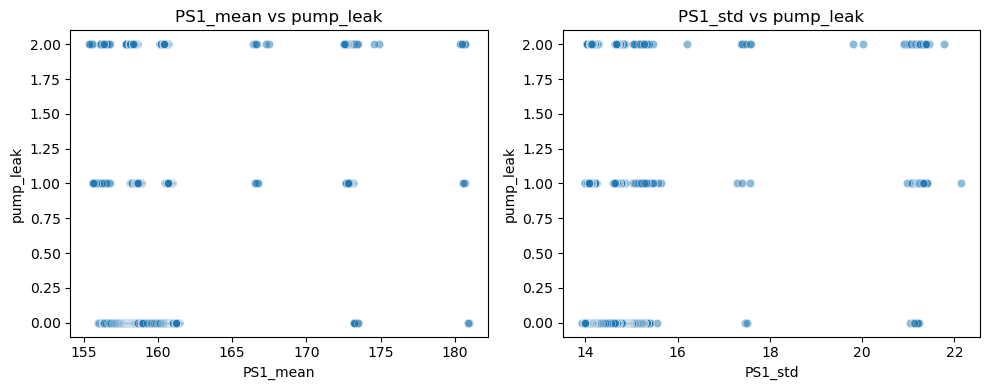

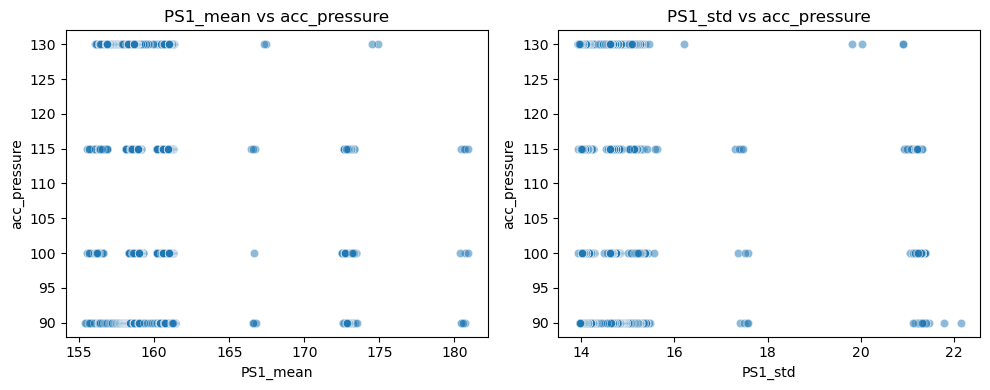

In [6]:
# Define the list of target variables representing health indices of various components
targets = ["cooler_pct", "valve_pct", "pump_leak", "acc_pressure"]

# Define the list of features (summary statistics from sensor PS1)
features = ["PS1_mean", "PS1_std"]

# Loop through each target variable to create scatter plots
for tgt in targets:
    # Create a row of subplots for the two PS1 features
    fig, axes = plt.subplots(1, len(features), figsize=(5 * len(features), 4))

    # Loop through each feature and corresponding axis to plot scatter plots
    for ax, feat in zip(axes, features):
        # Create a scatter plot for the current feature against the current target
        sns.scatterplot(x=feat, y=tgt, data=df, alpha=0.5, ax=ax)

        # Set the title and axis labels
        ax.set_title(f"{feat} vs {tgt}")
        ax.set_xlabel(feat)
        ax.set_ylabel(tgt)

    # Adjust spacing between plots
    plt.tight_layout()

    # Display the plots
    plt.show()


## Bivariate Analysis Insights: PS1 Features vs Target Variables

In this section, we explored the relationships between the pressure sensor features (`PS1_mean`, `PS1_std`) and the key health indicators of the hydraulic system components (`cooler_pct`, `valve_pct`, `pump_leak`, `acc_pressure`). Both visual and numerical methods were used to understand trends, potential correlations, and group-level differences.

---

### 1. `PS1_mean` and `PS1_std` vs `cooler_pct`

- **Visual Insight**:
  - The scatter plot shows no strong pattern or trend between either `PS1_mean` or `PS1_std` and `cooler_pct`.
  - There is a wide spread of `cooler_pct` values across all ranges of `PS1_mean` and `PS1_std`.

- **Numerical Insight**:
  - Correlation coefficients:
    - `PS1_mean`: -0.002 → negligible correlation
    - `PS1_std`: -0.478 → moderate negative correlation
  - This suggests that while `PS1_mean` does not relate meaningfully to `cooler_pct`, higher variability in pressure (i.e., high `PS1_std`) may correspond to lower cooler efficiency.

---

### 2. `PS1_mean` and `PS1_std` vs `valve_pct`

- **Visual Insight**:
  - The scatter plots again show no clear pattern; data appears relatively clustered at high `valve_pct` values, indicating possible saturation.

- **Numerical Insight**:
  - Correlation coefficients:
    - `PS1_mean`: -0.153 (weak negative)
    - `PS1_std`: -0.149 (weak negative)
  - The weak correlation suggests only a slight inverse relationship — higher `PS1` values may be associated with marginally lower valve effectiveness.

---

### 3. `PS1_mean` and `PS1_std` vs `pump_leak`

- **Visual Insight**:
  - The scatter plot indicates some group separation, particularly between leak levels (0, 1, 2).
  - Higher values of both `PS1_mean` and `PS1_std` appear more frequently with higher leak levels.

- **Numerical Insight**:
  - Correlation:
    - `PS1_mean`: 0.312
    - `PS1_std`: 0.306
  - Group means:
    - `pump_leak = 0`: PS1_mean = 159.09, PS1_std = 14.70
    - `pump_leak = 2`: PS1_mean = 162.38, PS1_std = 16.13
  - Insight: **Stronger positive correlation and increasing trend in group means suggest that higher pressure and variability are associated with increased pump leakage risk.**

---

### 4. `PS1_mean` and `PS1_std` vs `acc_pressure`

- **Visual Insight**:
  - The scatter plots show some trend: as `PS1_mean` increases, `acc_pressure` tends to decrease slightly.
  - For `PS1_std`, the relationship is less apparent.

- **Numerical Insight**:
  - Correlation:
    - `PS1_mean`: -0.199 (weak negative)
    - `PS1_std`: -0.074 (very weak)
  - Indicates a slight inverse relationship between pressure sensor readings and accumulator pressure.

---

### Summary:

- `PS1_std` shows a **moderate negative correlation** with `cooler_pct`, hinting at an efficiency drop with pressure variability.
- Both `PS1_mean` and `PS1_std` have **moderate positive correlations** with `pump_leak`, indicating that elevated pressure and instability may be precursors to leak failures.
- Relationships with `valve_pct` and `acc_pressure` are relatively weak or unclear.
- These findings suggest that PS1 features may serve as useful indicators for **early leak detection**, but are less impactful for valve or cooler performance metrics.

### 2. Correlation Heatmap: All Summary‐Stat Features vs Targets

In this analysis, we investigate how all available sensor summary statistics relate to the four key target health indicators: `cooler_pct`, `valve_pct`, `pump_leak`, and `acc_pressure`. The summary-stat features include metrics like `mean`, `std`, `min`, and `max` for pressure, temperature, vibration, and flow sensors.

The goal of this step is to identify:
- Which sensors and statistical measures show the strongest relationships with each health indicator.
- Potential predictors for downstream modeling or anomaly detection tasks.

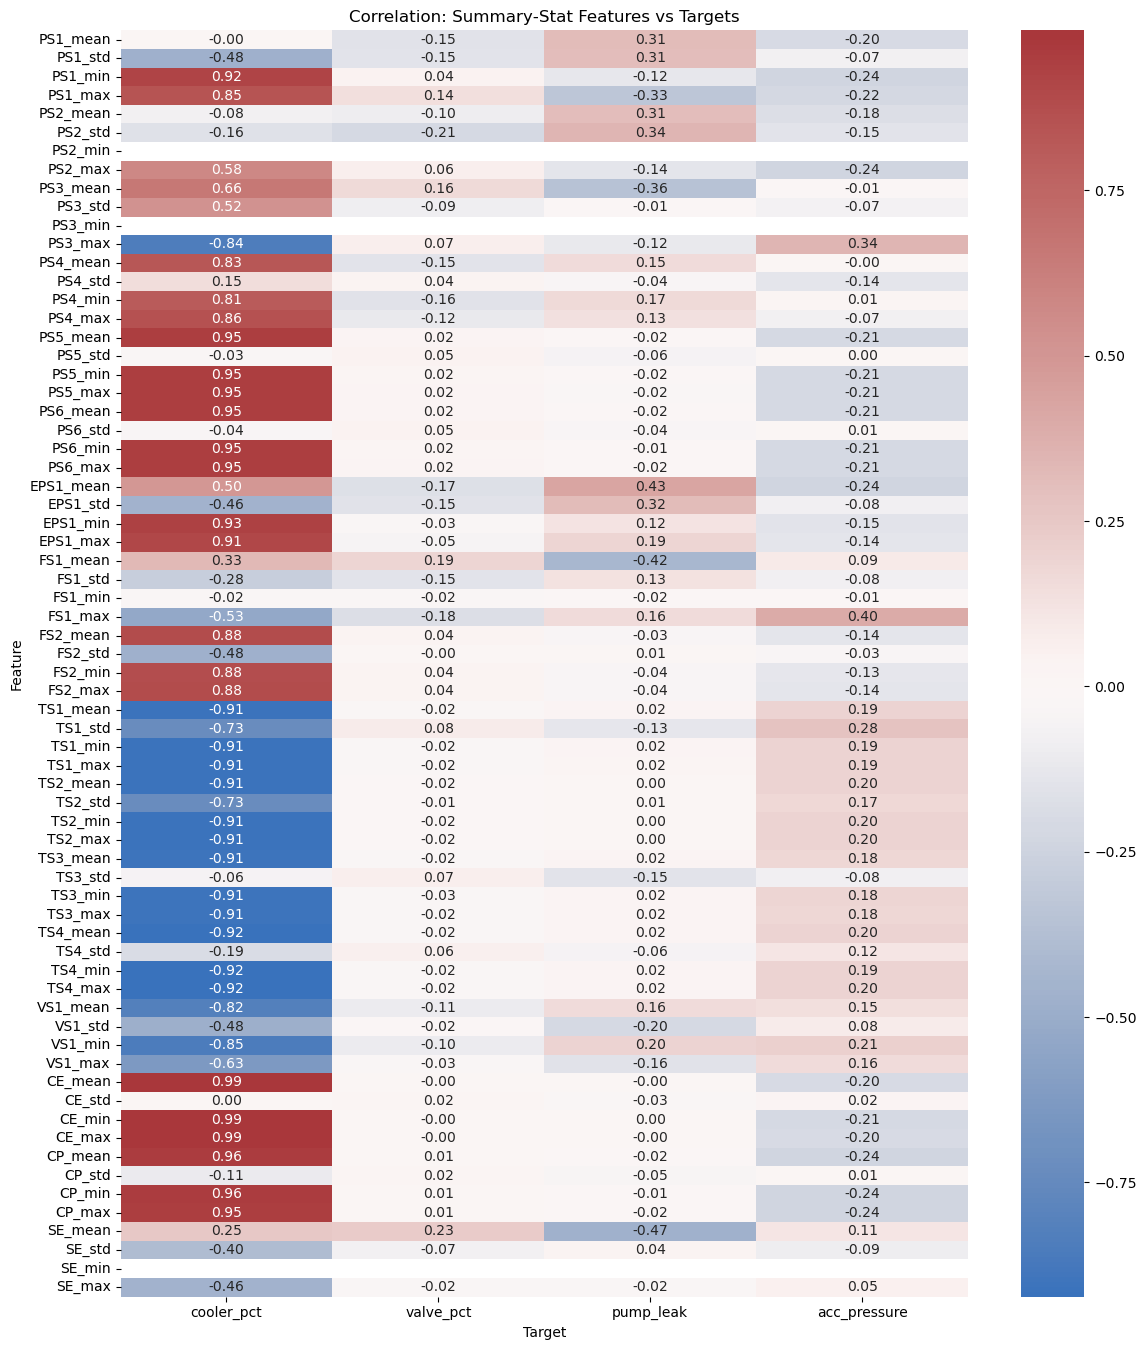

In [7]:
# b) Build list of every summary-stat feature actually present in the dataframe (df).
# Create a list of prefixes corresponding to various sensors and measurement types.
prefixes = [f"PS{i}" for i in range(1,7)] + ["EPS1"] + ["FS1","FS2"] + ["TS1","TS2","TS3","TS4","VS1","CE","CP","SE"]

# Initialize an empty list to hold the summary-statistic columns found in the dataframe.
stat_cols = []

# Loop through each prefix to check for the existence of summary-stat columns (mean, std, min, max) for each prefix.
for p in prefixes:
    for suffix in ["mean","std","min","max"]:
        col = f"{p}_{suffix}"  # Construct column name like 'PS1_mean', 'FS1_std', etc.
        
        # Check if the column exists in the dataframe, and if so, add it to stat_cols list.
        if col in df.columns:
            stat_cols.append(col)

# Now, create a new dataframe (corr_df) containing the selected summary-stat columns and target variables.
corr_df = df[stat_cols + targets]

# Calculate the correlation matrix for the selected columns in corr_df.
corr = corr_df.corr()

# Plot a heatmap of the correlation between summary-stat features and target variables.
# Set the size of the figure dynamically based on the number of features.
plt.figure(figsize=(12, max(6, len(stat_cols)*0.2)))

# Use Seaborn to plot the heatmap, displaying the correlations between each feature and target.
sns.heatmap(
    corr.loc[stat_cols, targets],  # Slice correlation matrix to only show feature ↔ target correlations.
    annot=True,  # Annotate each cell with the correlation value.
    fmt=".2f",  # Format the annotations to two decimal places.
    cmap="vlag",  # Color map for the heatmap.
    center=0  # Center the color scale at 0 to highlight positive and negative correlations.
)

# Add titles and labels to the plot for clarity.
plt.title("Correlation: Summary‐Stat Features vs Targets")
plt.ylabel("Feature")  # Label for the y-axis (features).
plt.xlabel("Target")   # Label for the x-axis (targets).

# Adjust layout to avoid overlapping text and labels.
plt.tight_layout()

plt.show()  # Display the heatmap.

### 3. Most-Correlated Features vs Each Target

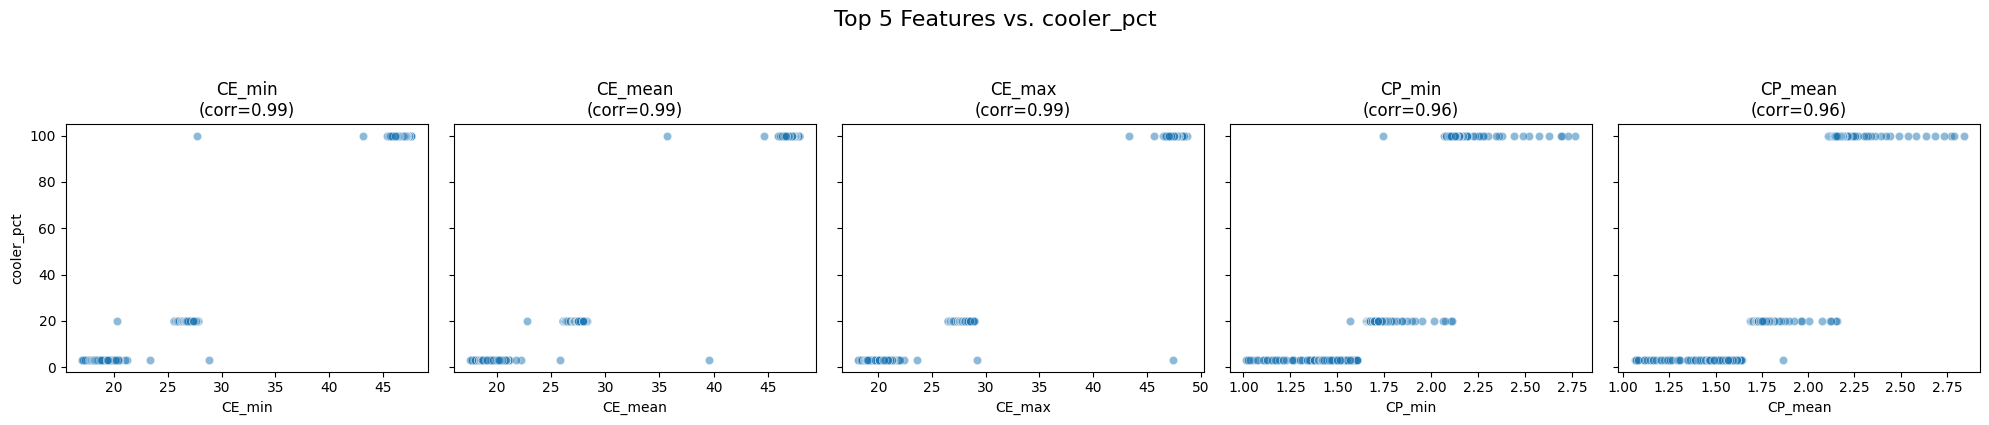

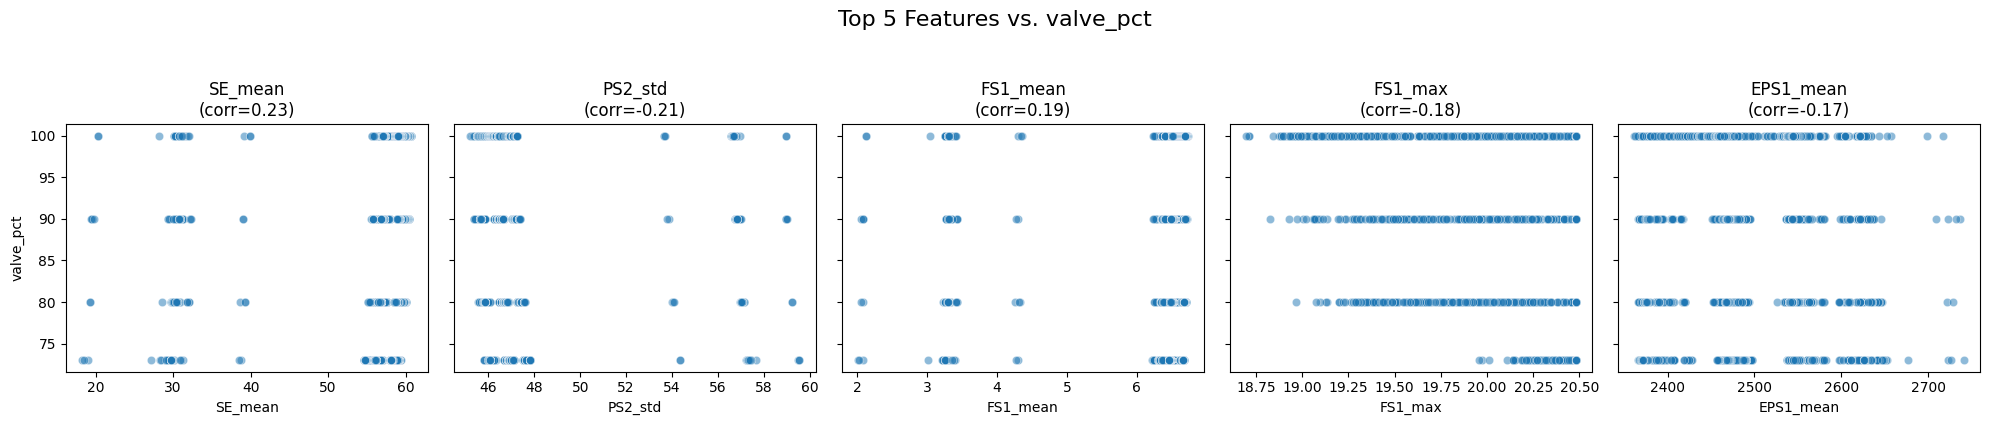

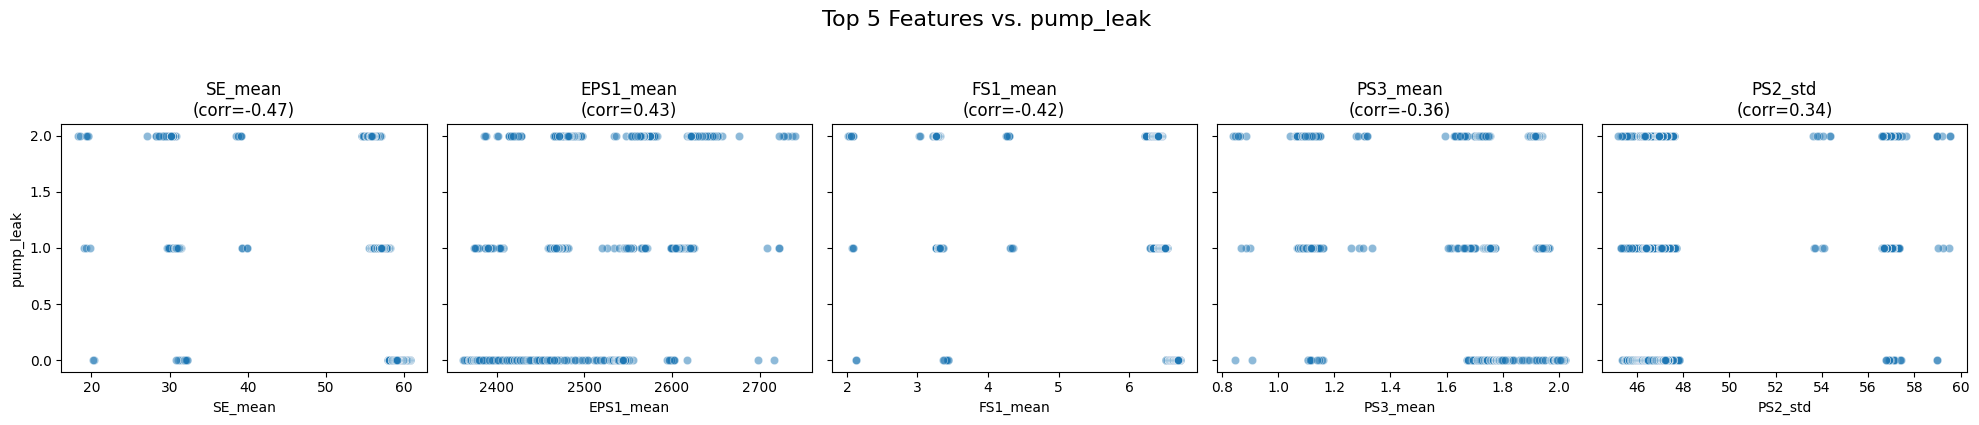

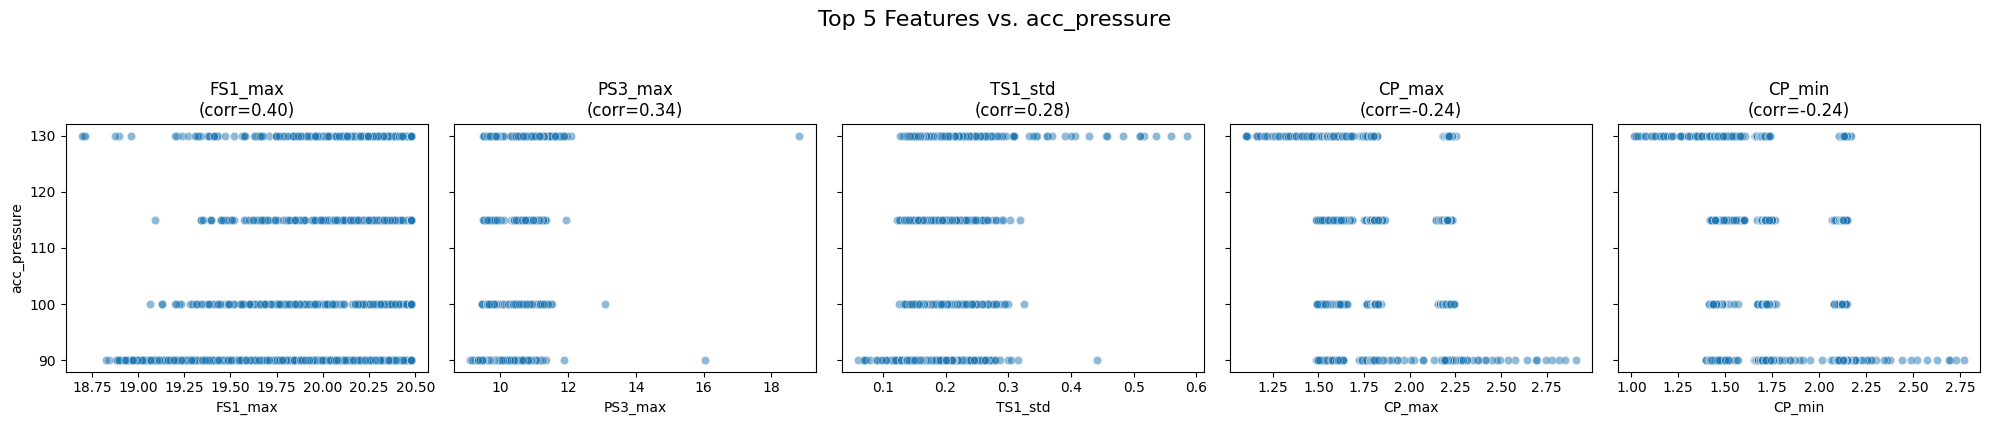

In [25]:
# 1. Gather summary‐stat feature names
stat_cols = [c for c in df.columns if c.endswith(("_mean","_std","_min","_max"))]
targets   = ["cooler_pct", "valve_pct", "pump_leak", "acc_pressure"]

# 2. Compute correlations (feature ↔ target)
corr_df = df[stat_cols + targets].corr().loc[stat_cols, targets]

# 3. For each target, select top‐k features by |corr|
top_k = 5
top_feats = {
    tgt: corr_df[tgt].abs().sort_values(ascending=False).head(top_k).index.tolist()
    for tgt in targets
}

# 4. Plot those best correlates
for tgt, feats in top_feats.items():
    n = len(feats)
    fig, axes = plt.subplots(1, n, figsize=(4*n, 4), sharey=True)
    fig.suptitle(f"Top {n} Features vs. {tgt}", y=1.05, fontsize=16)
    
    for ax, feat in zip(axes, feats):
        sns.scatterplot(x=df[feat], y=df[tgt], alpha=0.5, ax=ax)
        ax.set_title(f"{feat}\n(corr={corr_df.at[feat,tgt]:.2f})")
        ax.set_xlabel(feat)
        ax.set_ylabel(tgt)
    
    plt.tight_layout()
    plt.show()
